# Modelling of physical systems – lab1 (Simulation of Brownian motion) 
## Katarzyna Wilk

### Random movement

Part 1 - Importing libraries

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
steps = 1000 # number of steps
particles = 1000 # number of trajecories

Part 2 - Drawing random coordinates for each particle. We start with creating two arrays, one for coordinates x and one for coordinates y. Every column has coordinates for one step for every particle, and every row has coordinates for every step for one particle. We draw our random number using the np.random.normal() function and then add the result to the previous step.

In [3]:
coordx = np.array([ [0]*steps for i in range(particles)])
coordy = np.array([ [0]*steps for i in range(particles)])
for i in range(particles):
    x,y = 0,0
    coordx[i][0] = x
    coordy[i][0] = y
    for j in range(1,steps):
        randx = int(np.random.normal(0,1)*10)
        randy = int(np.random.normal(0,1)*10)
        x = int(x + randx)
        y = int(y + randy)
        coordx[i][j] = x
        coordy[i][j] = y

Part 3 - Plotting results. In this step, we plot the routes for our particles using the plot() function.

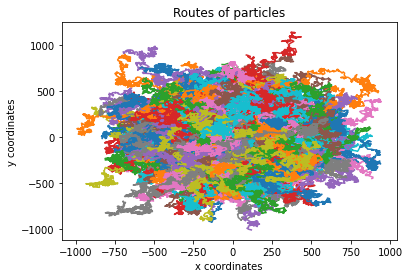

In [4]:
fig, ax = plt.subplots()
for i in range(particles):
    ax.plot(coordx[i], coordy[i])
plt.xlabel("x coordinates") 
plt.ylabel("y coordinates") 
plt.title("Routes of particles")
plt.show()

## Mean square of displacement

Part 1 - Squaring each coordinate. 

In [5]:
xpow = []
ypow = []
for xx in zip(coordx,coordy):
    xtemp = [x**2 for x in xx[0]]
    ytemp = [y**2 for y in xx[1]]
    xpow.append(xtemp)
    ypow.append(ytemp)

Part 2 - Adding our coordinates and dividing them by the number of particles. In this step, we add all coordinates from each step column-wise, then adding x and y coordinates and divide the result by the number of particles.

In [6]:
xsum = np.transpose(np.sum(xpow,axis=0))
ysum = np.transpose(np.sum(ypow,axis=0))
suma = np.divide(np.add(xsum,ysum),particles)

Part 3 - Ploting the results.

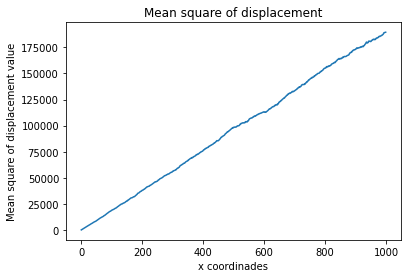

In [7]:
plt.plot(suma)
plt.title("Mean square of displacement")
plt.xlabel("x coordinades") 
plt.ylabel("Mean square of displacement value") 
plt.show()

## Autocorrelation

The pyplot library has the acorr function, which lets us plot the autocorrelation.

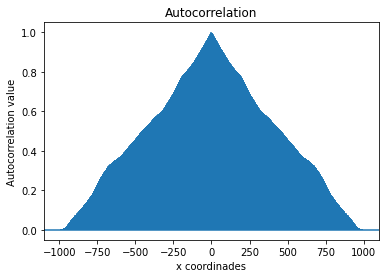

In [14]:
xxx = coordx[0].astype(float)

plt.acorr(xxx, maxlags=steps-1)
plt.title("Autocorrelation")
plt.xlabel("x coordinades") 
plt.ylabel("Autocorrelation value") 
plt.show()

## Density

Step 1 - Flattening a matrix of coordinates into a list of coordinates.

In [15]:
x_arr = coordx.flatten()
y_arr = coordy.flatten()

Step 2 - Counting how many times the same set of coordinates is repeating itself.

In [16]:
coords = np.column_stack((x_arr, y_arr))

unique_coords, counts = np.unique(coords, axis=0, return_counts=True)

coords_counts = np.column_stack((unique_coords, counts))

In [17]:
x = coords_counts[:, 0]
y = coords_counts[:, 1]
counts = coords_counts[:, 2]

Step 3 - Plotting density.

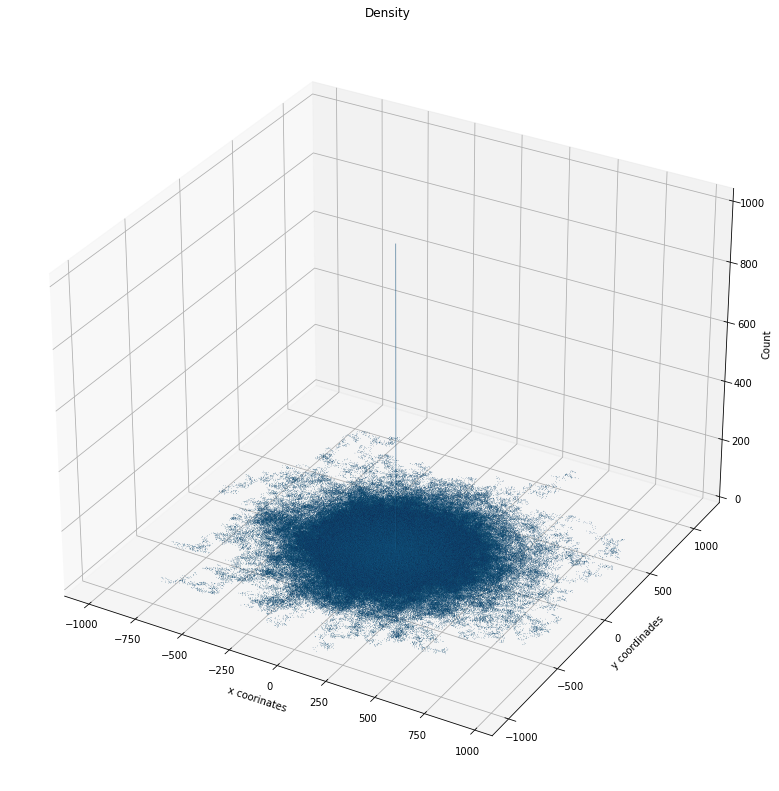

In [18]:
fig = plt.figure(figsize=(36, 14))
ax = fig.add_subplot(111, projection='3d')


bottom = np.zeros_like(counts)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, counts, shade=True)
ax.set_title('Density')

ax.set_xlabel('x coorinates')
ax.set_ylabel('y coordinades')
ax.set_zlabel('Count')

plt.show()

The starting x and y coordinate make this plot look very unbalanced. This is how our density plot looks like if we ignore the starting coordinates (we can do it by deleting the first column from coordx and coordy).

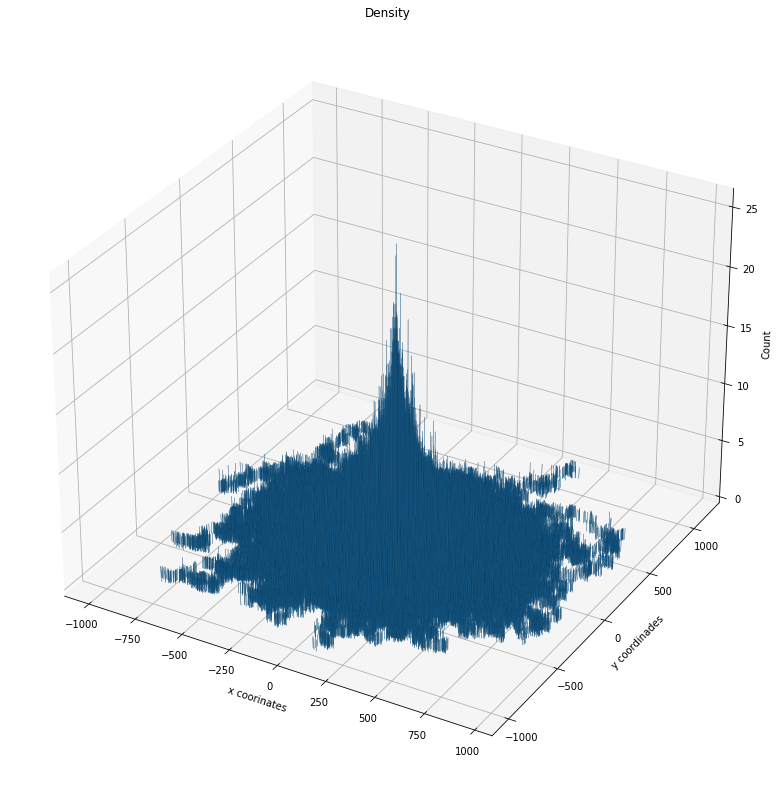

In [19]:
x_0 = np.delete(coordx,0,1)
y_0 = np.delete(coordy,0,1)
x_0 = x_0.flatten()
y_0 = y_0.flatten()

coords = np.column_stack((x_0, y_0))

unique_coords, counts = np.unique(coords, axis=0, return_counts=True)

coords_counts = np.column_stack((unique_coords, counts))

fig = plt.figure(figsize=(36, 14))
ax = fig.add_subplot(111, projection='3d')


bottom = np.zeros_like(counts)
width = depth = 1

ax.bar3d(x, y, bottom, width, depth, counts, shade=True)
ax.set_title('Density')

ax.set_xlabel('x coorinates')
ax.set_ylabel('y coordinades')
ax.set_zlabel('Count')

plt.show()

### Conclusions

This simulation shows, that while the movement of every particle is independent, they are aurocorrelated. The mean displacement is growing over time, and if we use more than a few hundred particles and steps, it starts looking similar to a linear function. If we look at the density plot, we can see the most of the repeating coordinates are near the starting area. If we ignore the starting coordinates 0,0, our plot looks similar to Gaussian distribution.